In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##Helper functions. Use when needed. 
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()


In [2]:
## Step 1: Read dataset and visualize it
df = pd.read_csv("face_data.csv")
targets = df["target"]
pixels = df.drop(["target"],axis=1)

In [3]:
print (np.array(pixels).shape)

(400, 4096)


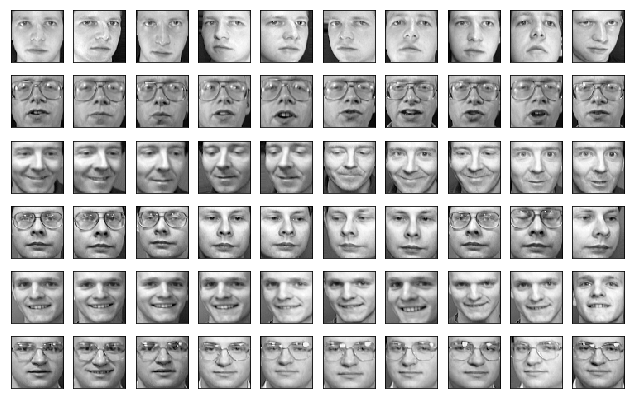

In [4]:
show_orignal_images(pixels)

In [5]:
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

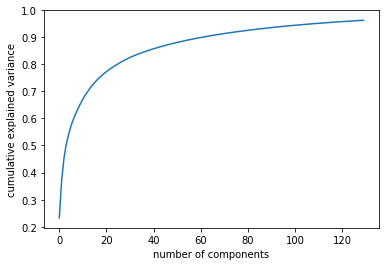

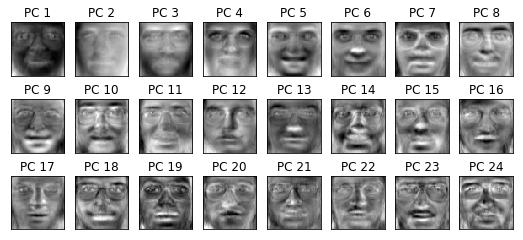

In [15]:
## Step 3: Perform PCA.
pca = PCA(n_components=130).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

In [16]:
## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


In [17]:
Xtrain_pca

array([[-5.10861433,  8.43448107, -0.8228836 , ...,  0.11180697,
        -0.15060924, -0.13001617],
       [-1.80684527, -1.48029976, -4.5393675 , ...,  0.16885241,
         0.10226066, -0.13808246],
       [ 3.44006301, -1.61996322, -5.18841001, ...,  0.1207742 ,
        -0.19479623, -0.15652292],
       ...,
       [-3.63199478, -3.22031539, -2.08738272, ...,  0.20015271,
         0.01403425, -0.07401712],
       [-4.66302616, -1.86485703, -0.10157889, ...,  0.04657233,
        -0.01957804,  0.4587894 ],
       [-2.1310963 ,  4.29696972, -5.23942807, ..., -0.03179195,
        -0.45685009,  0.34397818]])

In [18]:
## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

In [19]:
clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.025s
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       0.60      1.00      0.75         3
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       0.75      1.00      0.86         3
          16       1.00 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
